In [3]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [4]:
#Import dataframe
df_100pos = pd.read_csv('DataFiles/merged_per_minute.csv', low_memory=False)

In [5]:
# Adding additional advanced metric columns

# Shooting efficiency
df_100pos['FG3A%'] = df_100pos['FG3A'] / df_100pos['FGA']
df_100pos['PTS/FGA'] = df_100pos['PTS'] / df_100pos['FGA']
df_100pos['FG3M/FGM'] = df_100pos['FG3M'] / df_100pos['FGM']
df_100pos['FTA/FGA'] = df_100pos['FTA'] / df_100pos['FGA']

# True Shooting Percentage
df_100pos['TRU%'] = 0.5 * df_100pos['PTS'] / (df_100pos['FGA'] + 0.475 * df_100pos['FTA'])

# Assists to Turnover Ratio
df_100pos['AST_TOV'] = df_100pos['AST'] / df_100pos['TOV']

df_100pos['POSSESSION'] = df_100pos.apply(lambda row: row['FGA'] + 0.44 * row['FTA'] - row['OREB'] + row['TOV'], axis=1)

df_100pos[(df_100pos['PLAYER_ID'] == 1629029)]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
17024,1629029,Luka Doncic,1610612742,DAL,20.0,72,28,44,0.389,2317.740000,0.22,0.51,0.427,0.07,0.22,0.327,0.15,0.21,0.713,0.04,0.21,0.24,0.19,0.11,0.03,0.01,0.02,0.06,0.17,0.66,2018-19,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.431373,1.294118,0.318182,0.411765,0.541205,1.727273,0.6724
17025,1629029,Luka Doncic,1610612742,DAL,21.0,61,36,25,0.590,2047.245000,0.28,0.61,0.463,0.08,0.26,0.316,0.21,0.27,0.758,0.04,0.24,0.28,0.26,0.13,0.03,0.01,0.03,0.07,0.22,0.86,2019-20,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.426230,1.409836,0.285714,0.442623,0.582459,2.000000,0.8188
17026,1629029,Luka Doncic,1610612742,DAL,21.0,6,2,4,0.333,214.566667,0.30,0.60,0.500,0.07,0.21,0.364,0.20,0.30,0.656,0.02,0.26,0.27,0.24,0.14,0.03,0.01,0.02,0.08,0.26,0.87,2019-20,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.350000,1.450000,0.233333,0.500000,0.585859,1.714286,0.8520
17027,1629029,Luka Doncic,1610612742,DAL,22.0,66,40,26,0.606,2262.396667,0.29,0.60,0.479,0.08,0.24,0.350,0.15,0.21,0.730,0.02,0.21,0.23,0.25,0.12,0.03,0.02,0.02,0.07,0.16,0.81,2020-21,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.400000,1.350000,0.275862,0.350000,0.578778,2.083333,0.7924
17028,1629029,Luka Doncic,1610612742,DAL,22.0,7,3,4,0.429,281.021667,0.34,0.70,0.490,0.11,0.27,0.408,0.10,0.18,0.529,0.01,0.18,0.20,0.26,0.11,0.03,0.01,0.02,0.06,0.16,0.89,2020-21,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.385714,1.271429,0.323529,0.257143,0.566518,2.363636,0.8792
17029,1629029,Luka Doncic,1610612742,DAL,23.0,65,44,21,0.677,2300.718333,0.28,0.61,0.457,0.09,0.25,0.353,0.16,0.21,0.744,0.02,0.23,0.26,0.25,0.13,0.03,0.02,0.02,0.06,0.17,0.80,2021-22,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.409836,1.311475,0.321429,0.344262,0.563579,1.923077,0.8124
17030,1629029,Luka Doncic,1610612742,DAL,23.0,15,7,8,0.467,551.956667,0.29,0.64,0.455,0.09,0.27,0.345,0.19,0.24,0.770,0.02,0.25,0.27,0.17,0.11,0.05,0.02,0.03,0.08,0.21,0.86,2021-22,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.421875,1.343750,0.310345,0.375000,0.570292,1.545455,0.8356
17031,1629029,Luka Doncic,1610612742,DAL,24.0,66,33,33,0.500,2390.471667,0.30,0.61,0.496,0.08,0.23,0.342,0.22,0.29,0.742,0.02,0.22,0.24,0.22,0.10,0.04,0.01,0.02,0.07,0.20,0.89,2022-23,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.377049,1.459016,0.266667,0.475410,0.595119,2.200000,0.8176


In [6]:
# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
df_100pos['POSITION'] = df_100pos['POSITION'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')

In [7]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [8]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [9]:
# New object for European players playing at F in regular season games:
europe_F_regular = filter_europe(df_100pos, 'COUNTRY', europe)
europe_F_regular = europe_F_regular.loc[europe_F_regular['POSITION'].isin(['F']) & europe_F_regular['Season'].isin(['Regular Season'])]

In [10]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [11]:
# New object for Non-europe players playing at F in regular season games:
non_europe_F_regular = filter_non_europe(df_100pos)
non_europe_F_regular = non_europe_F_regular.loc[non_europe_F_regular['POSITION'].isin(['F']) & non_europe_F_regular['Season'].isin(['Regular Season'])]

In [12]:
# Number of positions per unique European player:
europe_F_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
F    103
Name: PLAYER_ID, dtype: int64

In [13]:
# Number of positions per unique US player:
non_europe_F_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
F    876
Name: PLAYER_ID, dtype: int64

In [14]:
non_europe_F_regular['HEIGHT'].describe()

count     4581
unique      10
top        6-9
freq      1104
Name: HEIGHT, dtype: object

In [15]:
non_europe_F_regular.head(10)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
0,920,A.C. Green,1610612742,DAL,33.0,83,23,60,0.277,2494.298333,0.09,0.19,0.483,0.0,0.01,0.05,0.05,0.08,0.650,0.09,0.17,0.26,0.03,0.03,0.03,0.01,0.02,0.06,0.00,0.24,1996-97,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000,0.052632,1.263158,0.0,0.421053,0.526316,1.000000,0.1652
1,920,A.C. Green,1610612742,DAL,34.0,82,20,62,0.244,2645.506667,0.09,0.20,0.453,0.0,0.00,0.00,0.04,0.06,0.716,0.08,0.17,0.25,0.05,0.03,0.03,0.01,0.01,0.06,0.00,0.23,1997-98,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000,0.000000,1.150000,0.0,0.300000,0.503282,1.666667,0.1764
2,920,A.C. Green,1610612742,DAL,35.0,50,19,31,0.380,923.338333,0.12,0.28,0.422,0.0,0.01,0.00,0.03,0.06,0.577,0.09,0.16,0.25,0.03,0.02,0.03,0.01,0.02,0.07,0.00,0.27,1998-99,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000,0.035714,0.964286,0.0,0.214286,0.437601,1.500000,0.2364
3,920,A.C. Green,1610612747,LAL,36.0,82,67,15,0.817,1930.201667,0.09,0.20,0.447,0.0,0.00,0.25,0.03,0.05,0.695,0.08,0.17,0.25,0.04,0.03,0.03,0.01,0.01,0.07,0.01,0.21,1999-00,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000,0.000000,1.050000,0.0,0.250000,0.469274,1.333333,0.1720
5,920,A.C. Green,1610612748,MIA,37.0,82,50,32,0.610,1411.818333,0.10,0.23,0.444,0.0,0.00,0.00,0.06,0.08,0.712,0.08,0.15,0.22,0.03,0.03,0.02,0.01,0.02,0.08,0.00,0.26,2000-01,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000,0.000000,1.130435,0.0,0.347826,0.485075,1.000000,0.2152
42,768,Acie Earl,1610612749,MIL,27.0,47,14,33,0.298,500.141667,0.13,0.36,0.374,0.0,0.01,0.00,0.11,0.17,0.643,0.07,0.12,0.19,0.04,0.07,0.03,0.06,0.02,0.12,0.00,0.38,1996-97,Regular Season,Iowa,USA,1993,1,19,55,F,6-11,240.0,1993,1996,0.027778,1.055556,0.0,0.472222,0.431083,0.571429,0.4348
43,228,Adam Keefe,1610612762,UTA,27.0,62,48,14,0.774,916.788333,0.09,0.17,0.513,0.0,0.00,0.00,0.08,0.11,0.689,0.08,0.15,0.24,0.03,0.05,0.03,0.01,0.01,0.11,0.00,0.26,1996-97,Regular Season,Stanford,USA,1992,1,10,32,F,6-9,230.0,1992,2000,0.000000,1.529412,0.0,0.647059,0.584927,0.600000,0.1884
45,228,Adam Keefe,1610612762,UTA,28.0,80,61,19,0.763,2047.091667,0.11,0.21,0.540,0.0,0.00,0.00,0.08,0.10,0.810,0.09,0.13,0.21,0.04,0.03,0.03,0.01,0.03,0.08,0.00,0.30,1997-98,Regular Season,Stanford,USA,1992,1,10,32,F,6-9,230.0,1992,2000,0.000000,1.428571,0.0,0.476190,0.582524,1.333333,0.1940
47,228,Adam Keefe,1610612762,UTA,29.0,44,32,12,0.727,642.508333,0.09,0.19,0.452,0.0,0.01,0.00,0.10,0.14,0.697,0.08,0.14,0.22,0.04,0.05,0.02,0.02,0.03,0.10,0.00,0.27,1998-99,Regular Season,Stanford,USA,1992,1,10,32,F,6-9,230.0,1992,2000,0.052632,1.421053,0.0,0.736842,0.526316,0.800000,0.2216
49,228,Adam Keefe,1610612762,UTA,30.0,62,41,21,0.661,608.380000,0.09,0.21,0.408,0.0,0.00,0.00,0.05,0.06,0.806,0.07,0.15,0.22,0.06,0.08,0.03,0.02,0.03,0.15,0.01,0.22,1999-00,Regular Season,Stanford,USA,1992,1,10,32,F,6-9,230.0,1992,2000,0.000000,1.047619,0.0,0.285714,0.461216,0.750000,0.2464


In [16]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
europe_F_regular['Europe'] = 'European'
non_europe_F_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([europe_F_regular, non_europe_F_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV', 'POSSESSION']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


alt.VConcatChart(...)

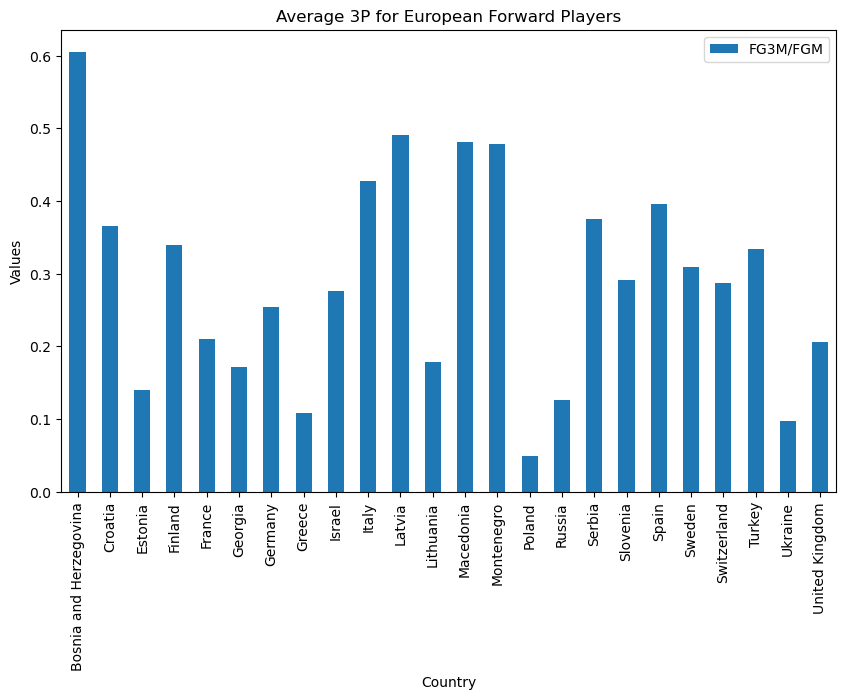

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean % for three points made for Europeans:
avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].mean().reset_index()
# avg_STL_europe = europe_F_regular.groupby('COUNTRY')['STL'].mean().reset_index()
# avg_FGA_europe = europe_F_regular.groupby('COUNTRY')['FG3A%'].mean().reset_index()
# avg_AST_europe = europe_F_regular.groupby('COUNTRY')['AST'].mean().reset_index()

# # Merge the two DataFrames
# merged_df = pd.merge(avg_3p_europe,on='COUNTRY')

# Set 'COUNTRY' as index
avg_3p_europe.set_index('COUNTRY', inplace=True)

# Plot
avg_3p_europe.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Average 3P for European Forward Players')

# Show plot
plt.show()


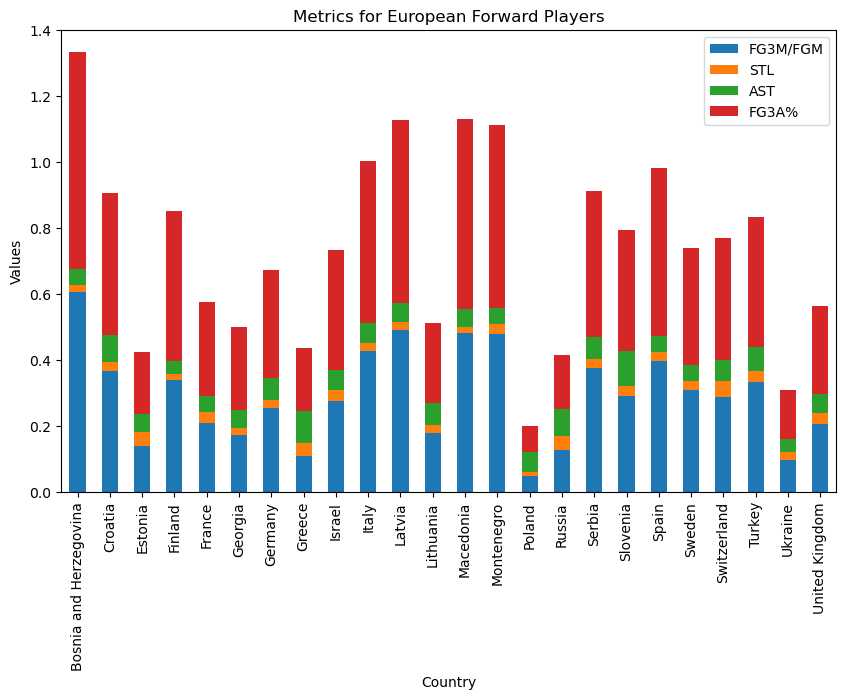

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean % for three points made for Europeans:
avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].mean().reset_index()
avg_STL_europe = europe_F_regular.groupby('COUNTRY')['STL'].mean().reset_index()
avg_FGA_europe = europe_F_regular.groupby('COUNTRY')['FG3A%'].mean().reset_index()
avg_AST_europe = europe_F_regular.groupby('COUNTRY')['AST'].mean().reset_index()

# Merge the three DataFrames
merged_df = pd.merge(avg_3p_europe, avg_STL_europe, on='COUNTRY')
merged_df = pd.merge(merged_df,avg_AST_europe,   on='COUNTRY')
merged_df = pd.merge(merged_df,avg_FGA_europe,   on='COUNTRY')
# Set 'COUNTRY' as index
merged_df.set_index('COUNTRY', inplace=True)

# Plot
merged_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Metrics for European Forward Players')

# Show plot
plt.show()

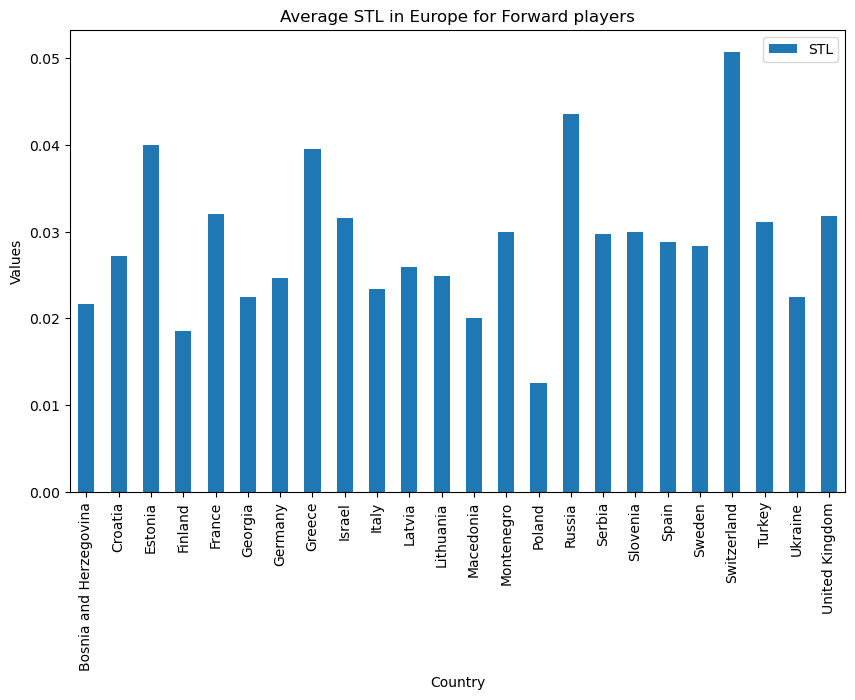

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean % for three points made for Europeans:
# avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].mean().reset_index()
avg_STL_europe = europe_F_regular.groupby('COUNTRY')['STL'].mean().reset_index()
# avg_FGA_europe = europe_F_regular.groupby('COUNTRY')['FG3A%'].mean().reset_index()
# avg_AST_europe = europe_F_regular.groupby('COUNTRY')['AST'].mean().reset_index()

# # Merge the two DataFrames
# merged_df = pd.merge(avg_3p_europe,on='COUNTRY')

# Set 'COUNTRY' as index
avg_STL_europe.set_index('COUNTRY', inplace=True)

# Plot
avg_STL_europe.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Average STL in Europe for Forward players')

# Show plot
plt.show()

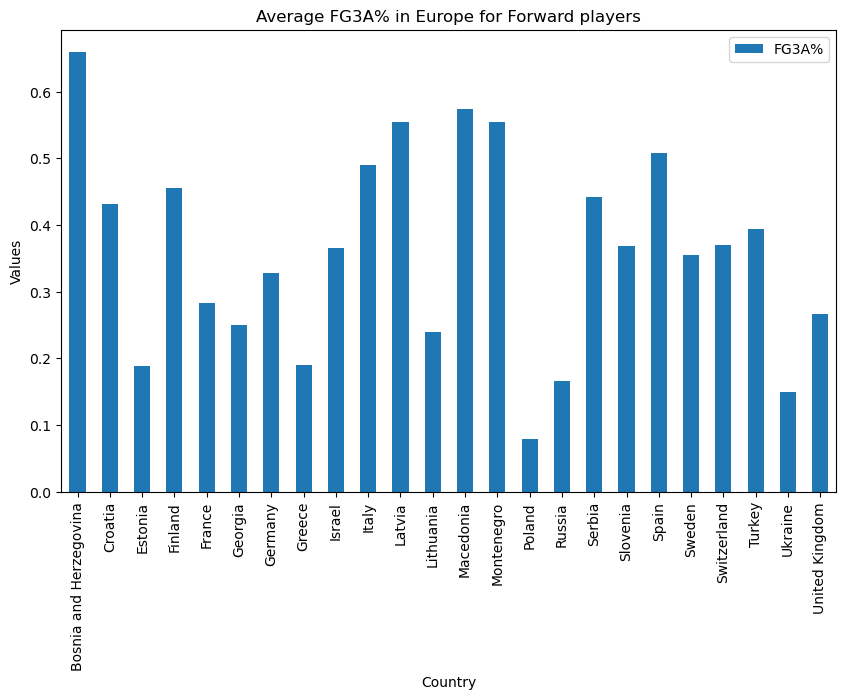

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean % for three points made for Europeans:
# avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].mean().reset_index()
# avg_STL_europe = europe_F_regular.groupby('COUNTRY')['STL'].mean().reset_index()
avg_FGA_europe = europe_F_regular.groupby('COUNTRY')['FG3A%'].mean().reset_index()
# avg_AST_europe = europe_F_regular.groupby('COUNTRY')['AST'].mean().reset_index()

# # Merge the two DataFrames
# merged_df = pd.merge(avg_3p_europe,on='COUNTRY')

# Set 'COUNTRY' as index
avg_FGA_europe.set_index('COUNTRY', inplace=True)

# Plot
avg_FGA_europe.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Average FG3A% in Europe for Forward players')

# Show plot
plt.show()

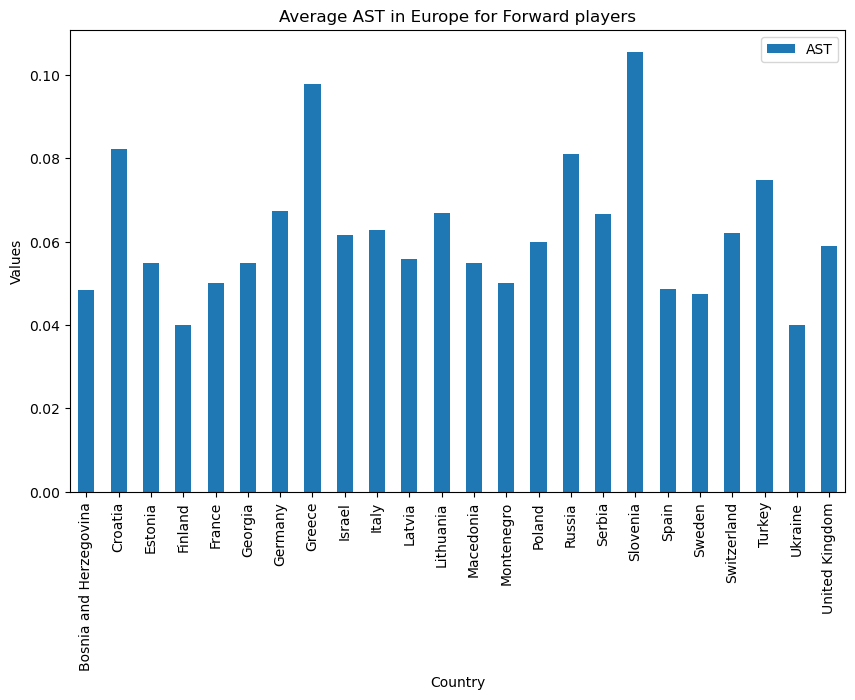

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean % for three points made for Europeans:
# avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].mean().reset_index()
# avg_STL_europe = europe_F_regular.groupby('COUNTRY')['STL'].mean().reset_index()
# avg_FGA_europe = europe_F_regular.groupby('COUNTRY')['FG3A%'].mean().reset_index()
avg_AST_europe = europe_F_regular.groupby('COUNTRY')['AST'].mean().reset_index()

# # Merge the two DataFrames
# merged_df = pd.merge(avg_3p_europe,on='COUNTRY')

# Set 'COUNTRY' as index
avg_AST_europe .set_index('COUNTRY', inplace=True)

# Plot
avg_AST_europe .plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Average AST in Europe for Forward players')

# Show plot
plt.show()